<a href="https://colab.research.google.com/github/maddhujasen27/Language-Translator/blob/main/Language_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers sentencepiece datasets --quiet
! pip install gTTS --quiet
! pip install streamlit    --quiet
! pip install pytesseract --quiet
!sudo apt install tesseract-ocr --quiet

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 17.9 MB/s 
     |████████████████████████████████| 311 kB 50.7 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
     |████████████████████████████████| 895 kB 37.7 MB/s 
     |████████████████████████████████| 3.3 MB 36.0 MB/s 
     |████████████████████████████████| 243 kB 46.1 MB/s 
     |████████████████████████████████| 133 kB 48.5 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
     |████████████████████████████████| 144 kB 46.8 MB/s 
     |████████████████████████████████| 271 kB 36.5 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 9.3 MB 4.5 MB/s 
     |████████████████████████████████| 180 kB 49.1 MB/s 
     |████████████████████████████████| 164 kB 53.5 MB/s 
     |████████████████████████████████| 4.3 MB 38.6 MB/s 
     |██████████████

In [ ]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook
from IPython.display import Audio
from gtts import gTTS
sns.set()

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_repo = 'google/mt5-small'
model_path = '/content/gdrive/My Drive/mt5_translation.pt'
max_seq_len = 20

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/553 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [ ]:
dataset = load_dataset('alt')

Downloading:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.52k [00:00<?, ?B/s]

No config specified, defaulting to: alt/alt-parallel


Downloading:   0%|          | 0.00/21.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/162k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.23k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset alt downloaded and prepared to /root/.cache/huggingface/datasets/alt/alt-parallel/1.0.0/e784a3f2a9f6bdf277940de6cc9d700eab852896cd94aad4233caf26008da9ed. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを下した。',
  'khm': 'អ៊ីតាលីបានឈ្នះលើព័រទុយហ្គាល់ 31-5 ក្នុងប៉ូលCនៃពីធីប្រកួតពានរង្វាន់

In [ ]:
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'ja': '<jp>',
    'zh': '<zh>'
}

In [ ]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250103, 512)

In [ ]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]
  
def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)
  
  return token_ids[0]

def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)
  
  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)
    
    if formatted_data is None:
      continue
    
    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))
    
  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [ ]:
# Testing `data_transform`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

<jp> ▁Italy ▁have ▁de feat ed ▁Portugal ▁3 1-5 ▁in ▁Pool ▁C ▁of ▁the ▁2007 ▁ Rugby ▁World ▁Cup ▁at ▁Parc ▁des ▁Princes , ▁Paris , ▁France . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ フランス の パリ 、 パル ク ・ デ ・ プラン ス で 行われた 2007 年 ラグビー ワールド カップ の プール C で 、 イタリア は 31 対 5 で ポル ト ガル を下 した 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

In [ ]:
n_epochs = 5
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [ ]:
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

In [ ]:
losses = []

In [ ]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [ ]:
test_loss = eval_model(model,test_dataset)

In [ ]:
test_loss

3.3140942454338074

In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
                
  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))
      
    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 3.137 | lr: 0.0004112341489551706
Epoch: 1 | Step: 100 | Avg. loss: 3.117 | lr: 0.0004067690659046258
Epoch: 1 | Step: 150 | Avg. loss: 3.178 | lr: 0.0004023039828540811
Epoch: 1 | Step: 200 | Avg. loss: 3.096 | lr: 0.0003978388998035364
Epoch: 1 | Step: 250 | Avg. loss: 3.109 | lr: 0.0003933738167529916
Epoch: 1 | Step: 300 | Avg. loss: 3.128 | lr: 0.00038890873370244687
Epoch: 1 | Step: 350 | Avg. loss: 3.047 | lr: 0.00038444365065190214
Epoch: 1 | Step: 400 | Avg. loss: 3.091 | lr: 0.0003799785676013574
Epoch: 1 | Step: 450 | Avg. loss: 3.149 | lr: 0.0003755134845508126
Epoch: 1 | Step: 500 | Avg. loss: 3.058 | lr: 0.00037104840150026794
Epoch: 1 | Step: 550 | Avg. loss: 3.057 | lr: 0.00036658331844972316
Epoch: 1 | Step: 600 | Avg. loss: 3.106 | lr: 0.0003621182353991784
Epoch: 1 | Step: 650 | Avg. loss: 3.039 | lr: 0.0003576531523486337
Epoch: 1 | Step: 700 | Avg. loss: 3.052 | lr: 0.00035318806929808896
Epoch: 1 | Step: 750 | Avg. loss: 3.016 | lr

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 2.839 | lr: 0.00031023397035184855
Epoch: 2 | Step: 100 | Avg. loss: 2.805 | lr: 0.0003057688873013038
Epoch: 2 | Step: 150 | Avg. loss: 2.900 | lr: 0.0003013038042507591
Epoch: 2 | Step: 200 | Avg. loss: 2.888 | lr: 0.0002968387212002143
Epoch: 2 | Step: 250 | Avg. loss: 2.822 | lr: 0.0002923736381496696
Epoch: 2 | Step: 300 | Avg. loss: 2.798 | lr: 0.00028790855509912484
Epoch: 2 | Step: 350 | Avg. loss: 2.829 | lr: 0.0002834434720485801
Epoch: 2 | Step: 400 | Avg. loss: 2.841 | lr: 0.0002789783889980354
Epoch: 2 | Step: 450 | Avg. loss: 2.765 | lr: 0.00027451330594749064
Epoch: 2 | Step: 500 | Avg. loss: 2.795 | lr: 0.0002700482228969459
Epoch: 2 | Step: 550 | Avg. loss: 2.777 | lr: 0.0002655831398464011
Epoch: 2 | Step: 600 | Avg. loss: 2.757 | lr: 0.00026111805679585645
Epoch: 2 | Step: 650 | Avg. loss: 2.802 | lr: 0.00025665297374531166
Epoch: 2 | Step: 700 | Avg. loss: 2.777 | lr: 0.00025218789069476693
Epoch: 2 | Step: 750 | Avg. loss: 2.749 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 2.596 | lr: 0.00020923379174852652
Epoch: 3 | Step: 100 | Avg. loss: 2.619 | lr: 0.00020476870869798178
Epoch: 3 | Step: 150 | Avg. loss: 2.679 | lr: 0.00020030362564743703
Epoch: 3 | Step: 200 | Avg. loss: 2.612 | lr: 0.0001958385425968923
Epoch: 3 | Step: 250 | Avg. loss: 2.666 | lr: 0.0001913734595463476
Epoch: 3 | Step: 300 | Avg. loss: 2.634 | lr: 0.00018690837649580283
Epoch: 3 | Step: 350 | Avg. loss: 2.675 | lr: 0.0001824432934452581
Epoch: 3 | Step: 400 | Avg. loss: 2.622 | lr: 0.00017797821039471334
Epoch: 3 | Step: 450 | Avg. loss: 2.637 | lr: 0.0001735131273441686
Epoch: 3 | Step: 500 | Avg. loss: 2.635 | lr: 0.00016904804429362385
Epoch: 3 | Step: 550 | Avg. loss: 2.596 | lr: 0.00016458296124307912
Epoch: 3 | Step: 600 | Avg. loss: 2.639 | lr: 0.00016011787819253438
Epoch: 3 | Step: 650 | Avg. loss: 2.625 | lr: 0.00015565279514198965
Epoch: 3 | Step: 700 | Avg. loss: 2.625 | lr: 0.00015118771209144492
Epoch: 3 | Step: 750 | Avg. loss: 2.630

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 2.532 | lr: 0.00010823361314520451
Epoch: 4 | Step: 100 | Avg. loss: 2.508 | lr: 0.00010376853009465976
Epoch: 4 | Step: 150 | Avg. loss: 2.478 | lr: 9.930344704411502e-05
Epoch: 4 | Step: 200 | Avg. loss: 2.510 | lr: 9.483836399357027e-05
Epoch: 4 | Step: 250 | Avg. loss: 2.461 | lr: 9.037328094302555e-05
Epoch: 4 | Step: 300 | Avg. loss: 2.458 | lr: 8.590819789248081e-05
Epoch: 4 | Step: 350 | Avg. loss: 2.443 | lr: 8.144311484193606e-05
Epoch: 4 | Step: 400 | Avg. loss: 2.527 | lr: 7.697803179139132e-05
Epoch: 4 | Step: 450 | Avg. loss: 2.484 | lr: 7.251294874084659e-05
Epoch: 4 | Step: 500 | Avg. loss: 2.508 | lr: 6.804786569030184e-05
Epoch: 4 | Step: 550 | Avg. loss: 2.483 | lr: 6.35827826397571e-05
Epoch: 4 | Step: 600 | Avg. loss: 2.512 | lr: 5.911769958921236e-05
Epoch: 4 | Step: 650 | Avg. loss: 2.445 | lr: 5.465261653866762e-05
Epoch: 4 | Step: 700 | Avg. loss: 2.475 | lr: 5.0187533488122886e-05
Epoch: 4 | Step: 750 | Avg. loss: 2.466 | lr: 4

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 2.420 | lr: 7.2334345418824795e-06
Epoch: 5 | Step: 100 | Avg. loss: 2.370 | lr: 2.7683514913377387e-06
Epoch: 5 | Step: 150 | Avg. loss: 2.473 | lr: 0.0
Epoch: 5 | Step: 200 | Avg. loss: 2.391 | lr: 0.0
Epoch: 5 | Step: 250 | Avg. loss: 2.382 | lr: 0.0
Epoch: 5 | Step: 300 | Avg. loss: 2.445 | lr: 0.0
Epoch: 5 | Step: 350 | Avg. loss: 2.410 | lr: 0.0
Epoch: 5 | Step: 400 | Avg. loss: 2.452 | lr: 0.0
Epoch: 5 | Step: 450 | Avg. loss: 2.386 | lr: 0.0
Epoch: 5 | Step: 500 | Avg. loss: 2.408 | lr: 0.0
Epoch: 5 | Step: 550 | Avg. loss: 2.406 | lr: 0.0
Epoch: 5 | Step: 600 | Avg. loss: 2.444 | lr: 0.0
Epoch: 5 | Step: 650 | Avg. loss: 2.458 | lr: 0.0
Epoch: 5 | Step: 700 | Avg. loss: 2.450 | lr: 0.0
Epoch: 5 | Step: 750 | Avg. loss: 2.410 | lr: 0.0
Epoch: 5 | Step: 800 | Avg. loss: 2.443 | lr: 0.0
Epoch: 5 | Step: 850 | Avg. loss: 2.493 | lr: 0.0
Epoch: 5 | Step: 900 | Avg. loss: 2.399 | lr: 0.0
Epoch: 5 | Step: 950 | Avg. loss: 2.405 | lr: 0.0
Epoch: 5 | St

In [ ]:
import pickle
pickle.dump(model,open("model_mt.pkl","wb"))

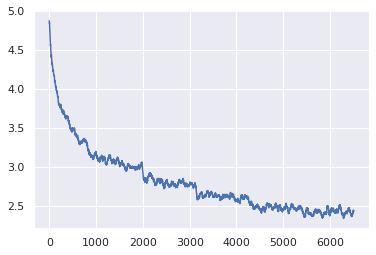

In [ ]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

In [ ]:
%%writefile app.py
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook
from IPython.display import Audio
from gtts import gTTS

import pytesseract
import shutil
import os
import random
import streamlit as st
from PIL import Image
import pickle

LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'ja': '<jp>',
    'zh': '<zh>'
}

model_repo = 'google/mt5-small'
tokenizer = AutoTokenizer.from_pretrained(model_repo)
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)

def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]
  
def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)
  
  return token_ids[0]

def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)
  
  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)
    
    if formatted_data is None:
      continue
    
    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))
    
  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)






st.markdown("<h1 style='text-align: center; color: white;'>Language Translator</h1>", unsafe_allow_html=True)
user_input = st.text_area("Enter Your Text")
img = st.file_uploader("Upload An Image", type=["png","jpg","jpeg"])
user_output = st.selectbox('Select A Language :', ('ja', 'en', 'zh'))
if st.button("Translate"):
  if img is not None :
    img_read = Image.open(img)
    ocr_text = pytesseract.image_to_string(img_read)
    st.image(img)
    model_repo = 'google/mt5-small'
    tokenizer = AutoTokenizer.from_pretrained(model_repo)
    special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
    tokenizer.add_special_tokens(special_tokens_dict)
    Input = ocr_text
    model = pickle.load(open("model_mt.pkl","rb"))
    Output = user_output
    input_ids = encode_input_str(
        text = Input,
        target_lang = Output,
        tokenizer = tokenizer,
        seq_len = 20,
        lang_token_map = LANG_TOKEN_MAPPING)
    input_ids = input_ids.unsqueeze(0).cuda()
    output_tokens = model.generate(input_ids, num_beams=30, length_penalty=0.2)
    st.text("INPUT : ")
    st.write(Input)
    out = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
    st.text("OUTPUT : ")
    st.write(out)
    sp = gTTS(out,lang = Output)
    sp.save('speech.mp3')
    st.write()
    st.write(Audio('speech.mp3',autoplay = False))
  else : 
    model_repo = 'google/mt5-small'
    tokenizer = AutoTokenizer.from_pretrained(model_repo)
    special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
    tokenizer.add_special_tokens(special_tokens_dict)
    Input = user_input
    model = pickle.load(open("model_mt.pkl","rb"))
    Output = user_output
    input_ids = encode_input_str(
        text = Input,
        target_lang = Output,
        tokenizer = tokenizer,
        seq_len = 20,
        lang_token_map = LANG_TOKEN_MAPPING)
    input_ids = input_ids.unsqueeze(0).cuda()
    output_tokens = model.generate(input_ids, num_beams=30, length_penalty=0.2)
    st.text("INPUT : ")
    st.write(Input)
    out = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
    st.text("OUTPUT : ")
    st.write(out)
    sp = gTTS(out,lang = Output)
    sp.save('speech.mp3')
    st.write()
    st.write(Audio('speech.mp3',autoplay = False))

  

Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 3.282s
your url is: https://nasty-zebra-65.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.224.147.139:8501

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
  Stopping...
^C
